## <center>Simulation of the apparent magnitudes for M82 X-2 donor star using MIST <center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tulips 
import mesaPlot as mp
from matplotlib import rc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('/Users/alba/Desktop/ESO/MIST stuff'))
import read_mist_models

In [3]:
# Some constants
rsun = 7.E10 #cm
msun = 2.E33 #g
g = 6.674E-8 #in the right units
c = 299792.E5 # cgs
loggsun = 4.438

In [4]:
# Calculate the radius of the donor assuming RL overflow, given CO mass, donor mass and Porb
def radius(mass1,mass2,porb): # input masses in Msun, porb in days
    q = mass2/mass1
    a = ((porb*3600.*24.)**2*g*(mass1+mass2)*msun/(4*(np.pi)**2))**(1./3.)
    r2 = (a*0.49*q**(2./3.))/(0.6*q**(2./3.)+np.log(1+q**(1./3.))) #in cm
    return r2/rsun

In [5]:
# Calculate mass function given Porb and the projected semi-axis 'a'
def fm(a,porb): # input porb in days, a in cm
    fm = (4*(np.pi)**2)/g*(a)**3/(porb*3600.*24.)**2/msun
    return fm 

In [6]:
# Some input parameters
mns = 1.4 #Neutron star mass in Msun
porb = 2.5
mstar = np.arange(0.1,40.1,0.1)

In [7]:
# Import MESA synthetic photometry:

phot2MASS = read_mist_models.ISOCMD('MIST_iso_2MASS.iso.cmd')

photJWST = read_mist_models.ISOCMD('MIST_iso_JWST.iso.cmd')


Reading in: MIST_iso_2MASS.iso.cmd
Reading in: MIST_iso_JWST.iso.cmd


### 2MASS

- Using the TAMS EPP values

In [8]:
J=[]
Kp=[]
H=[]
m=[]
for age in phot2MASS.ages:
    age_ind = phot2MASS.age_index(age)
    
    EEP=phot2MASS.isocmds[age_ind]['EEP'] 
    main_seq=EEP[np.where((EEP >= 454)  )] #TAMS 
    
    
    
    #Mass
    m.append(phot2MASS.isocmds[age_ind]['star_mass'][np.where((EEP == 454))])
    
    #Photometry
    
    J.append(phot2MASS.isocmds[age_ind]['2MASS_J'][np.where((EEP == 454) )])
    H.append(phot2MASS.isocmds[age_ind]['2MASS_H'][np.where((EEP == 454) )])
    Kp.append(phot2MASS.isocmds[age_ind]['Kepler_Kp'][np.where((EEP == 454) )])
    
   

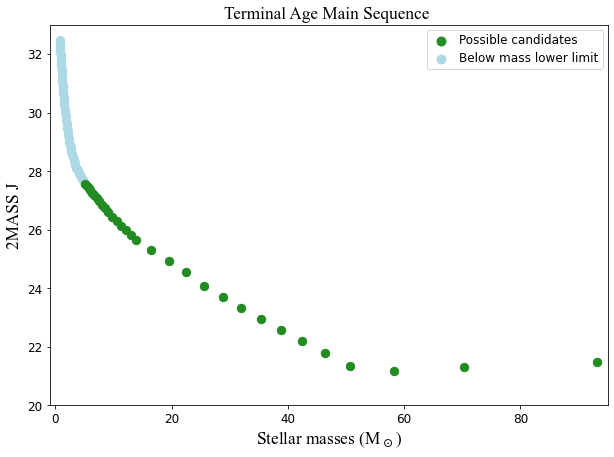

In [9]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],J[i]+27.74,color='forestgreen',zorder=2,s=70)
        else:
            plt.scatter(m[i],J[i]+27.74,color='lightblue',zorder=1,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='forestgreen', s=80,label='Possible candidates')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='Below mass lower limit')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar masses (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS J',fontsize='xx-large', fontname='Times New Roman')
plt.xlim(-1,95)
plt.ylim(20,33)
plt.legend()
plt.setp(plt.gca().get_legend().get_texts(), fontsize='large')
plt.tick_params(labelsize='large')
plt.show()

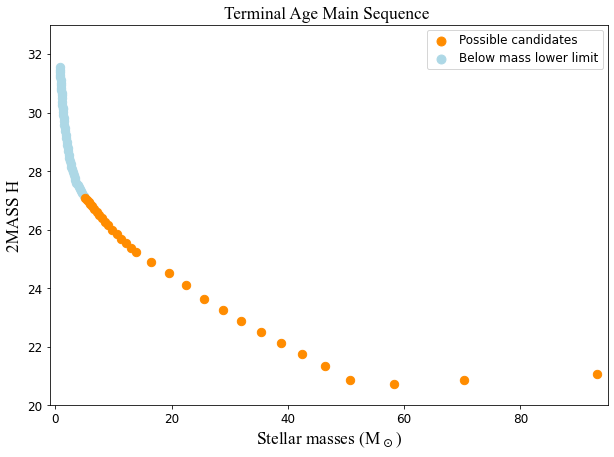

In [10]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],H[i]+27.74,color='darkorange',zorder=2,s=70)
        else:
            plt.scatter(m[i],H[i]+27.74,color='lightblue',zorder=1,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='darkorange', s=80,label='Possible candidates')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='Below mass lower limit')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar masses (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS H',fontsize='xx-large', fontname='Times New Roman')
plt.xlim(-1,95)
plt.ylim(20,33)
plt.legend()
plt.setp(plt.gca().get_legend().get_texts(), fontsize='large')
plt.tick_params(labelsize='large')
plt.show()

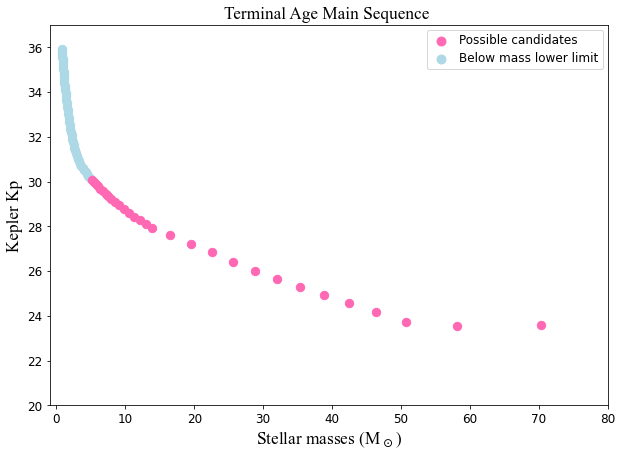

In [11]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],Kp[i]+27.74,color='hotpink',zorder=2,s=70)
        else:
            plt.scatter(m[i],Kp[i]+27.74,color='lightblue',zorder=1,s=70)

plt.scatter(-1.5,-1.5, color='hotpink', s=80,label='Possible candidates')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='Below mass lower limit') 
#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar masses (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('Kepler Kp',fontsize='xx-large', fontname='Times New Roman')
plt.legend()
plt.xlim(-1,80)
plt.ylim(20,37)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='large')
plt.tick_params(labelsize='large')
plt.show()
    

- Roche Lobe Radius

In [12]:
logr=[]
r=[]
logg=[]
for i in np.arange(0,len(m)):
    r.append(radius(mns,m[i],porb)) #roche radius
    

In [13]:
r=np.array(r)
m=np.array(m)
Kp=np.array(Kp)
H=np.array(H)
J=np.array(J)

In [14]:
#logg=[]
#for i in np.arange(0,len(m)):
    #logg.append(np.log10(m[i]/(r[i]**2)) + loggsun)
#logg=np.array(logg)

In [15]:
mass=[]
LOGG=[]

for age in phot2MASS.ages:
    age_ind = phot2MASS.age_index(age)
    
    EEP=phot2MASS.isocmds[age_ind]['EEP'] 
    main_seq=EEP[np.where((EEP == 454) & (EEP >= 605))] #TAMS 
    

    mass.append(phot2MASS.isocmds[age_ind]['star_mass'][np.where((EEP == 454) )])
    LOGG.append(phot2MASS.isocmds[age_ind]['log_g'][np.where((EEP == 454))])
    
mass=np.array(mass)
LOGG=np.array(LOGG)

   

In [16]:
r_star=[]
for i in np.arange(0,len(mass)):
    r_star.append(np.sqrt(mass[i]/10**(LOGG[i]-loggsun)))
Rstar=np.array(r_star)  #

In [17]:
true_mass=[]
true_r=[]
true_J=[]
true_Kp=[]
true_H=[]
for i in np.arange(0,len(mass)):
    r_roche=radius(mns,mass[i],porb)
    if r_star[i]>=r_roche:
        true_r.append(r_star[i])
        true_mass.append(mass[i])
        true_Kp.append(Kp[i])
        true_H.append(H[i])
        true_J.append(J[i])



In [18]:
mstar = np.arange(m.min(),m.max(),0.1)


In [19]:
mass1=np.linspace(mass.min(),mass.max(),1000)
logg1=np.linspace(LOGG[np.where(mass==mass.min())],LOGG[np.where(mass==mass.max())],1000)

In [20]:
mass1=mass1.flatten()
logg1=logg1.flatten()

In [21]:
mass1=mass1.astype(float)
logg1=logg1.astype(float)

(20.0, 100.0)

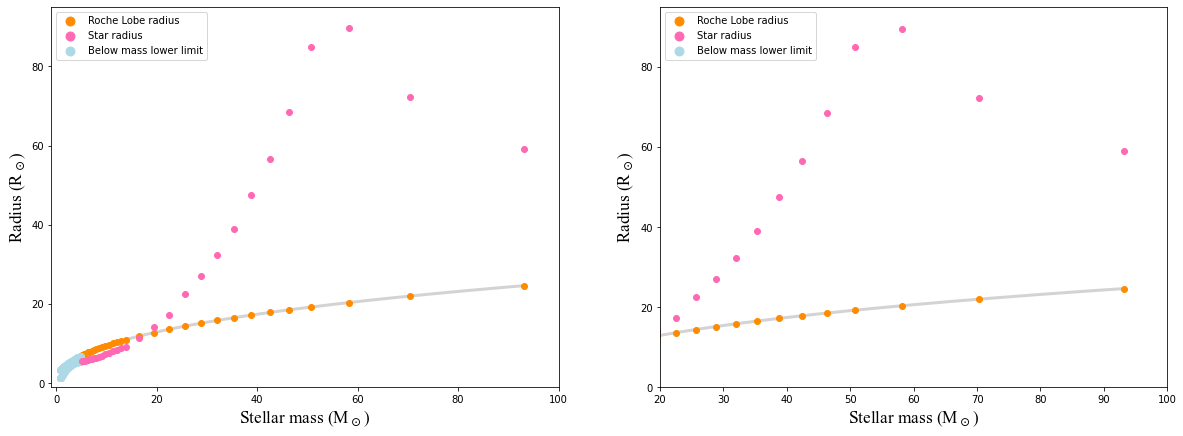

In [22]:
fig, axs=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
for i in np.arange(0,len(m)):
    if m[i]<=5:
        axs[0].scatter(m[i],r[i],zorder=1,color='lightblue')
    else:
        axs[0].scatter(m[i],r[i],zorder=1,color='darkorange')


for i in np.arange(0,len(mass)):
        if m[i]>=5:
            axs[0].scatter(mass[i], r_star[i],color='hotpink',zorder=2)
        else:
            axs[0].scatter(mass[i], r_star[i],color='lightblue',zorder=1)
        
axs[0].plot(mstar,radius(mns,mstar,porb),lw=3,zorder=0,color='lightgray')

axs[0].set_xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
axs[0].set_ylabel('Radius (R$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
axs[0].scatter(-3.5,-3.5, color='darkorange', s=80,label='Roche Lobe radius')
axs[0].scatter(-3.5,-3.5, color='hotpink', s=80,label='Star radius')
axs[0].scatter(-3.5,-3.5, color='lightblue', s=80,label='Below mass lower limit')
axs[0].legend(loc='upper left')
axs[0].set_ylim(-1,95)
axs[0].set_xlim(-1,100)


for i in np.arange(0,len(m)):
    if m[i]<=5:
        axs[1].scatter(m[i],r[i],zorder=1,color='lightblue')
    else:
        axs[1].scatter(m[i],r[i],zorder=1,color='darkorange')


for i in np.arange(0,len(mass)):
        if m[i]>=5:
            axs[1].scatter(mass[i], r_star[i],color='hotpink',zorder=2)
        else:
            axs[1].scatter(mass[i], r_star[i],color='lightblue',zorder=1)
        
axs[1].plot(mstar,radius(mns,mstar,porb),lw=3,zorder=0,color='lightgray')
#axs[1].plot(mass1,np.sqrt(mass1/10**(logg1-loggsun)),lw=3,zorder=0,color='lightgray',linestyle='-.')

axs[1].scatter(-3.5,-3.5, color='darkorange', s=80,label='Roche Lobe radius')
axs[1].scatter(-3.5,-3.5, color='hotpink', s=80,label='Star radius')
axs[1].scatter(-3.5,-3.5, color='lightblue', s=80,label='Below mass lower limit')

axs[1].set_xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
axs[1].set_ylabel('Radius (R$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
axs[1].legend(loc='upper left')


axs[1].set_ylim(0,95)
axs[1].set_xlim(20,100)


- Magnitudes

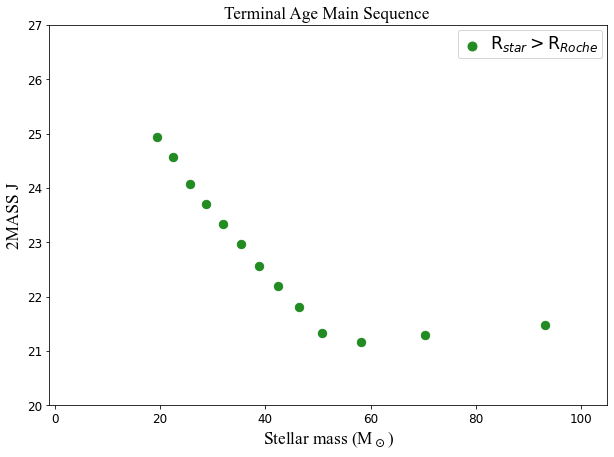

In [23]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_J[i]+27.74,color='forestgreen',zorder=1,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='forestgreen', s=80,label='R$_{star}>$R$_{Roche}$')

plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS J',fontsize='xx-large', fontname='Times New Roman')
plt.xlim(-1,105)
plt.ylim(20,27)
plt.legend()
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()

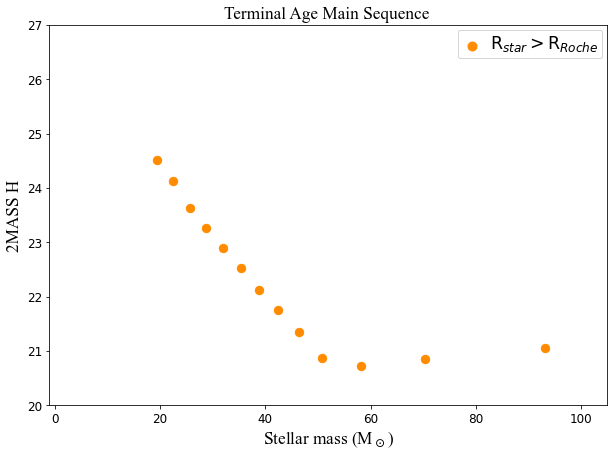

In [24]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_H[i]+27.74,color='darkorange',zorder=1,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='darkorange', s=80,label='R$_{star}>$R$_{Roche}$')

plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS H',fontsize='xx-large', fontname='Times New Roman')
plt.xlim(-1,105)
plt.ylim(20,27)
plt.legend()
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()

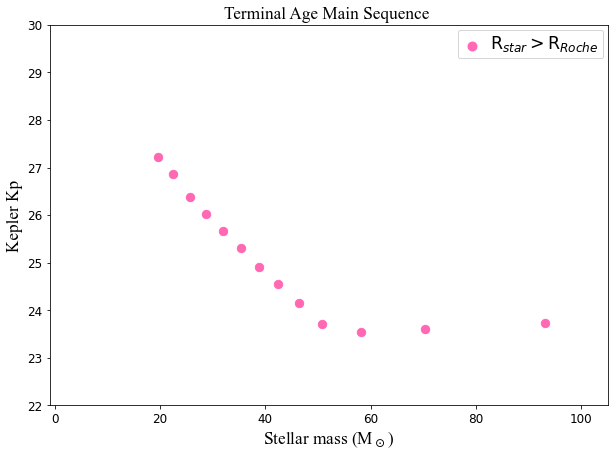

In [25]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_Kp[i]+27.74,color='hotpink',zorder=1,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='hotpink', s=80,label='R$_{star}>$R$_{Roche}$')

plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('Kepler Kp',fontsize='xx-large', fontname='Times New Roman')
plt.xlim(-1,105)
plt.ylim(22,30)
plt.legend()
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()

- All together

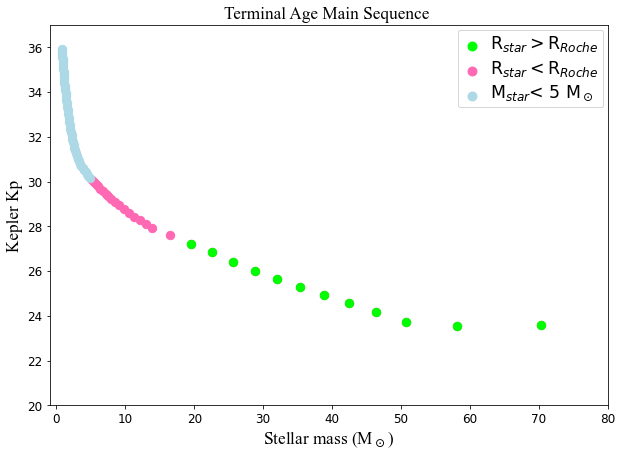

In [26]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],Kp[i]+27.74,color='hotpink',zorder=1,s=70)
        else:
            plt.scatter(m[i],Kp[i]+27.74,color='lightblue',zorder=2,s=70)
            
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_Kp[i]+27.74,color='lime',zorder=3,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='lime', s=80,label='R$_{star}>$R$_{Roche}$')

plt.scatter(-1.5,-1.5, color='hotpink', s=80,label='R$_{star}<$R$_{Roche}$')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='M$_{star}$< 5 M$_\odot$') 
#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('Kepler Kp',fontsize='xx-large', fontname='Times New Roman')
plt.legend()
plt.xlim(-1,80)
plt.ylim(20,37)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()
    

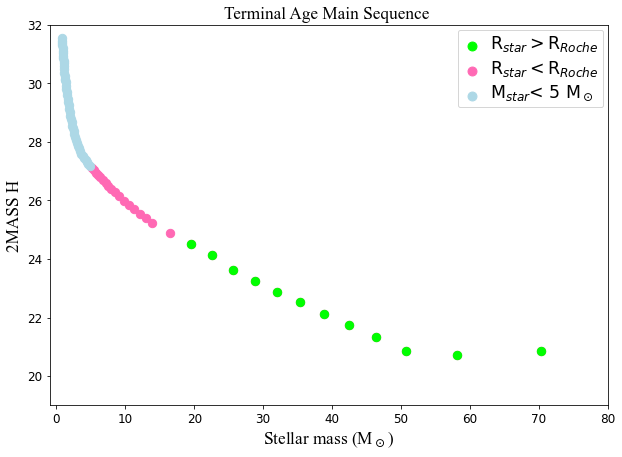

In [27]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],H[i]+27.74,color='hotpink',zorder=1,s=70)
        else:
            plt.scatter(m[i],H[i]+27.74,color='lightblue',zorder=2,s=70)
            
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_H[i]+27.74,color='lime',zorder=3,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='lime', s=80,label='R$_{star}>$R$_{Roche}$')

plt.scatter(-1.5,-1.5, color='hotpink', s=80,label='R$_{star}<$R$_{Roche}$')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='M$_{star}$< 5 M$_\odot$') 
#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS H',fontsize='xx-large', fontname='Times New Roman')
plt.legend()
plt.xlim(-1,80)
plt.ylim(19,32)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()
    

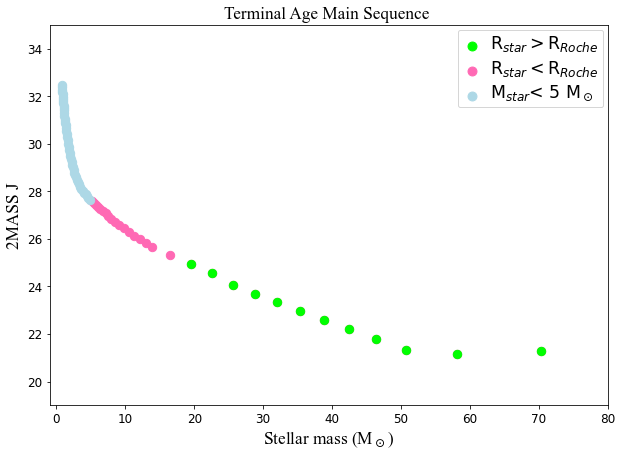

In [28]:
plt.figure(figsize=(10,7))
for i in np.arange(0,len(m)):
        if m[i]>=5:
            plt.scatter(m[i],J[i]+27.74,color='hotpink',zorder=1,s=70)
        else:
            plt.scatter(m[i],J[i]+27.74,color='lightblue',zorder=2,s=70)
            
for i in np.arange(0,len(true_mass)):
    plt.scatter(true_mass[i],true_J[i]+27.74,color='lime',zorder=3,s=70)

#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.scatter(-1.5,-1.5, color='lime', s=80,label='R$_{star}>$R$_{Roche}$')

plt.scatter(-1.5,-1.5, color='hotpink', s=80,label='R$_{star}<$R$_{Roche}$')
plt.scatter(-1.5,-1.5, color='lightblue', s=80,label='M$_{star}$< 5 M$_\odot$') 
#plt.axvspan(5, 15, alpha=0.3, color='red',zorder=0)
#plt.axvline(5,label=' x = 5 M$_\odot$',color='r')
plt.title('Terminal Age Main Sequence ',fontsize='xx-large', fontname='Times New Roman')
plt.xlabel('Stellar mass (M$_\odot$)',fontsize='xx-large', fontname='Times New Roman')
plt.ylabel('2MASS J',fontsize='xx-large', fontname='Times New Roman')
plt.legend()
plt.xlim(-1,80)
plt.ylim(19,35)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.show()
    